In [14]:
import numpy as np
import pandas as pd
import datetime
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
%matplotlib inline

In [3]:
wf = pd.read_csv(r'd:\Users\Fuuuuuuuuuun\Desktop\Files\nyu class\Principals of Urban Informatics\wildfre_cleaned.csv')

In [4]:
wf.head()

,year,cause,latitude,longitude,state,discovery_date,fire_size,county,month,day
0,2005,Miscellaneous,40.036944,-121.005833,CA,2005-02-02,0.10,Plumas,2,2
1,2004,Lightning,38.933056,-120.404444,CA,2004-05-12,0.25,Placer,5,12
2,2004,Debris Burning,38.984167,-120.735556,CA,2004-05-31,0.10,El Dorado,5,31
3,2004,Lightning,38.559167,-119.913333,CA,2004-06-28,0.10,Alpine,6,28
4,2004,Lightning,38.559167,-119.933056,CA,2004-06-28,0.10,Alpine,6,28


In [5]:
wf = wf.loc[(wf['year']>2005)&(wf['year']<2016)] #选取近10年数据预测

In [6]:
timeseries =  wf[['year','month','cause']].groupby(['year','month']).count().rename(columns={'cause':'total'}).reset_index()
timeseries['day']=1
timeseries['date']=pd.to_datetime(timeseries[['year','month','day']])
timeseries.set_index("date", inplace=True)
timeseries.head()

,year,month,total,day
date,,,,
2006-01-01,2006,1,9805,1
2006-02-01,2006,2,8277,1
2006-03-01,2006,3,18923,1
2006-04-01,2006,4,15901,1
2006-05-01,2006,5,8343,1


In [7]:
timepre =  wf[['year','month']].groupby(['year','month']).count().reset_index()
timepre['year']=timepre['year']+10
timepre['day']=1
timepre['date']=pd.to_datetime(timepre[['year','month','day']])
timepre.set_index("date", inplace=True)
timepre=timepre[0:36]
timepre.head()#用于预测16-18

,year,month,day
date,,,
2016-01-01,2016,1,1
2016-02-01,2016,2,1
2016-03-01,2016,3,1
2016-04-01,2016,4,1
2016-05-01,2016,5,1


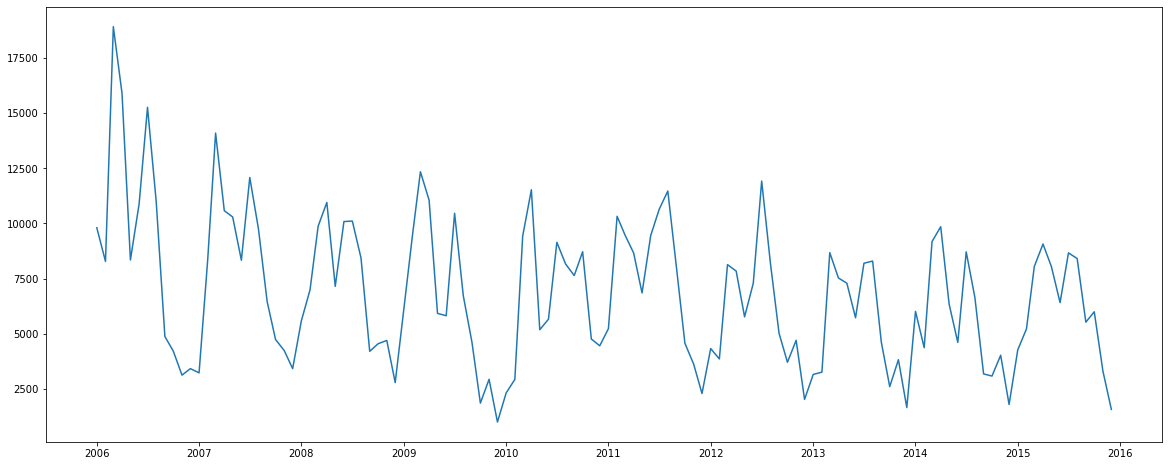

In [8]:
plt.figure(figsize=(20,8))
plt.plot(timeseries['total'], '-')

In [39]:
train = timeseries[0:84]
test = timeseries[84:]

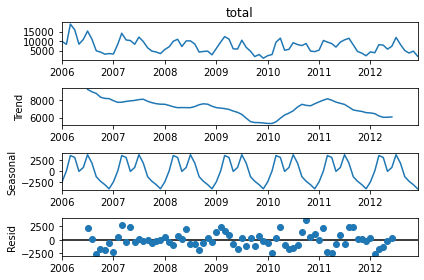

In [11]:
sm.tsa.seasonal_decompose(train['total']).plot()
result = sm.tsa.stattools.adfuller(train['total'])
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
D:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


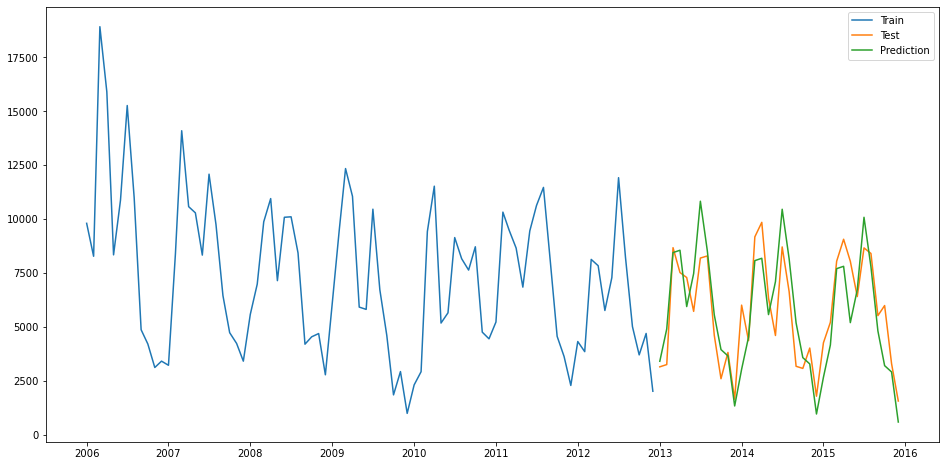

In [34]:
y_test0 = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['total']), seasonal_periods=12, trend='add', seasonal='add', ).fit()
y_test0['Holt_Winter'] = fit1.forecast(36)
plt.figure(figsize=(16, 8))
plt.plot(train['total'], label='Train')
plt.plot(test['total'], label='Test')
plt.plot(y_test0['Holt_Winter'], label='Prediction')
plt.legend(loc='best')
plt.show()#模型的拟合程度

In [35]:
y_test0.head()

,year,month,total,day,Holt_Winter
date,,,,,
2013-01-01,2013,1,3150,1,3408.688449
2013-02-01,2013,2,3255,1,4908.004428
2013-03-01,2013,3,8675,1,8447.702363
2013-04-01,2013,4,7523,1,8556.249784
2013-05-01,2013,5,7291,1,5944.274045


In [36]:
rms = sqrt(mean_squared_error(y_test0['total'], y_test0['Holt_Winter']))
print(rms)#模型的均方差 用于评价拟合效果

1439.0990325834334


In [37]:
n = len(y_test0)
mape = sum(np.abs((y_test0['total'] - y_test0['Holt_Winter'])/y_test0['total']))/n*100
mape#模型的平均绝对百分比误差 用于评价拟合效果

24.002303593110856

D:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
D:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


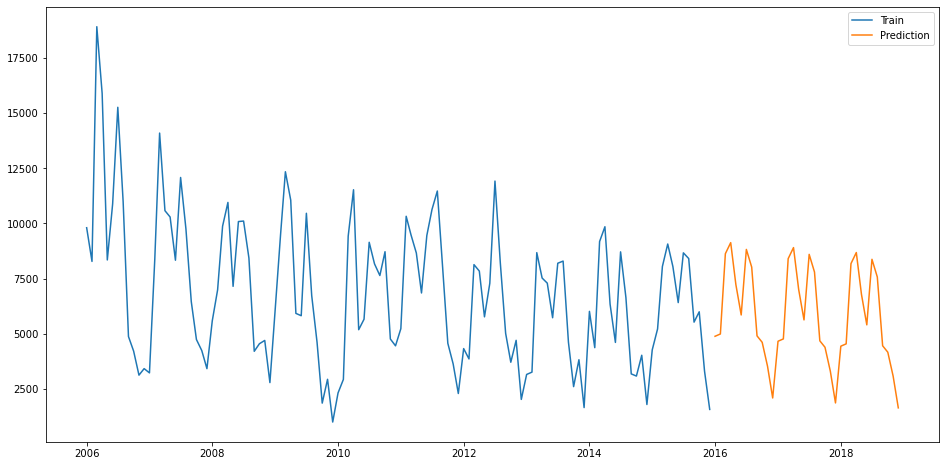

In [38]:
y_predict = timepre.copy()
fit1 = ExponentialSmoothing(np.asarray(timeseries['total']), seasonal_periods=12, trend='add', seasonal='add', ).fit()
y_predict['Holt_Winter'] = fit1.forecast(36)
plt.figure(figsize=(16, 8))
plt.plot(timeseries['total'], label='Train')
plt.plot(y_predict['Holt_Winter'], label='Prediction')
plt.legend(loc='best')
plt.show()